## Clustering factors vs. mass.

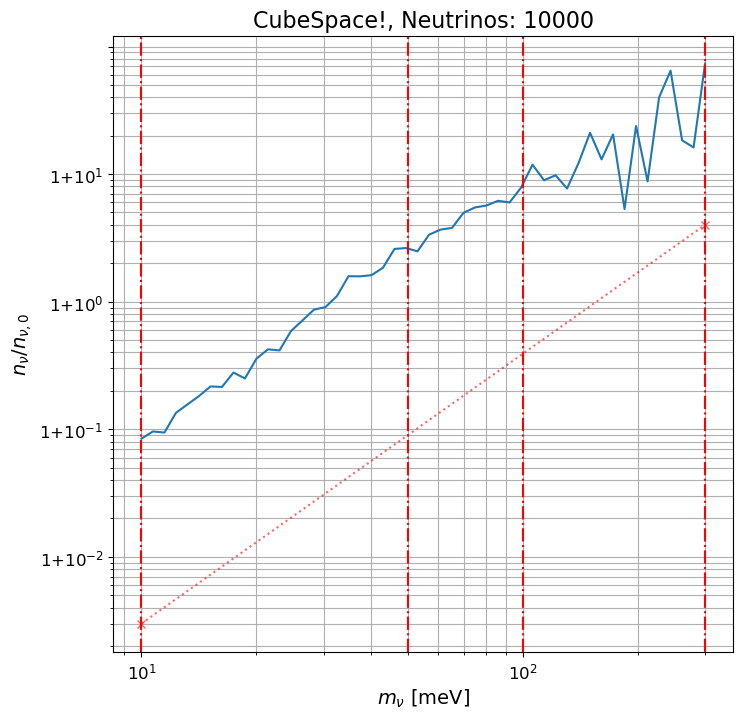

Max value: 74.57562676949154 73.57562676949154


In [3]:
from shared.preface import *
import shared.functions as fct

# Load data.
nus = 10000
sim = 'temp_data'
fname = f'nus_{nus}_CubeSpace'
u_all = fct.load_sim_data(sim, fname, 'velocities')

# 10 to 300 meV like in the paper.
mass_range_eV = np.geomspace(0.01, 0.3, 50)*eV

# Calculate number density, averaged values for z in [3.5, 4].
output = f'{sim}/number_densities_{nus}nus.npy'
fct.number_density_1_mass(
    u_all, mass_range_eV, output, average=True, z_average=3.5
)
n_nus = np.load(f'{output}')/N0

# Plotting:
fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.plot(mass_range_eV*1e3, (n_nus-1))
x_ends = [1e1, 3*1e2]
y_ends = [3*1e-3, 4]
ax.plot(x_ends, y_ends, marker='x', ls=':', c='r', alpha=0.6)

for m in NU_MASSES:
    ax.axvline(m*1e3, c='r', ls='-.')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(f'CubeSpace!, Neutrinos: {nus}')
ax.set_xlabel(r'$m_{\nu}$ [meV]')
ax.set_ylabel(r'$n_{\nu} / n_{\nu, 0}$')
# ax.set_ylim(1e-3, 1e1)
plt.grid(True, which="both", ls="-")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(fct.y_fmt))

plt.savefig(f'figures/clustering_factors_nus_{nus}_CubeSpace.pdf')
plt.show()

print('Max value:', np.max(n_nus), np.max(n_nus-1))

In [ ]:
from shared.preface import *
import shared.functions as fct

# Load data.
nus = 10000
u_all = fct.load_u_sim(nus, discrete=True)

def n_nu_of_redshift(m_eV):
    
    # Convert to momenta. 
    p, _ = fct.u_to_p_eV(u_all, m_eV)

    n_nus = np.zeros(len(ZEDS))
    for i, _ in enumerate(ZEDS):

        # Calculate number density.
        n_nus[i] = fct.number_density(p[:,0], p[:,i])

    np.save(
        f'neutrino_data/z_dependence_nus_{nus}_CubeSpace_{m_eV}eV.npy', 
        n_nus
        )


# Plotting.
fig, ax = plt.subplots(1,1, figsize=(8,14))

colors = ['blue', 'orange', 'green', 'red']

for j, m in enumerate(NU_MASSES):
    n_nu_of_redshift(m)

    n = np.load(
        f'neutrino_data/z_dependence_nus_{nus}_CubeSpace_{m}eV.npy'
        )/N0
    # print('Max:', np.max(n),'Mean:', np.mean(n))

    ax.semilogy(ZEDS, n-1, c=colors[j], label=r'$m_\nu$ ='+f'{m} eV')

ax.vlines(ZEDS_SNAPSHOTS, 1e-3, 5e1, colors='k', linestyles=':', label='Snapshots')

ax.set_title(f'{nus} neutrinos, solver={SOLVER}')
ax.set_xlabel('z')
ax.set_ylabel(r'$n_{\nu} / n_{\nu, 0}$')
ax.set_ylim(1e-3, 3e2)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(fct.y_fmt))
plt.legend(loc='upper right')
plt.savefig(f'figures/z_dependence_nus_{nus}_CubeSpace.pdf')
plt.show()

for z in ZEDS_SNAPSHOTS:
    print(f'{z:.2f}')